In [255]:
from functools import partial, reduce
import math
import random
import matplotlib.pyplot as plt
from collections import Counter,defaultdict, deque
import re
import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Capítulo 2

In [3]:
5/2

2.5

In [4]:
5//2

2

In [5]:
x = [4, 1, 2, 3]
y = sorted(x) # y é [1, 2, 3, 4], x não mudou
x.sort() # agora x é [1, 2, 3, 4]

In [6]:
pairs = [(x,y)
        for x in range(10)
        for y in range(10)]

In [7]:
def exp(base, power):
    return base ** power

two_to_the = partial(exp, 2)
print(two_to_the(3))

8


# Capítulo 3

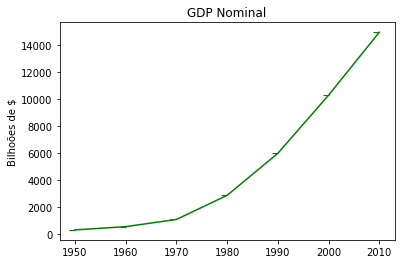

In [8]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green',marker=0, linestyle='solid')

plt.title("GDP Nominal")
plt.ylabel("Bilhoões de $")
plt.show()

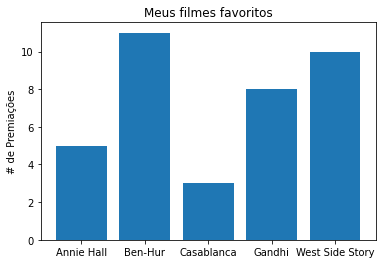

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar(movies, num_oscars)

plt.ylabel("# de Premiações")
plt.title("Meus filmes favoritos")

plt.xticks(movies)
plt.show()

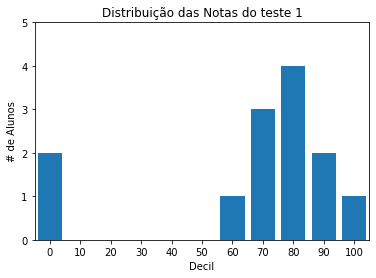

In [10]:
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
histogram = Counter([grade//10 * 10 for grade in grades])

plt.bar(histogram.keys(),histogram.values(),8)
plt.axis([-5,105,0,5])

plt.xticks([10 * i for i in range(11)])
plt.xlabel("Decil")
plt.ylabel("# de Alunos")
plt.title("Distribuição das Notas do teste 1")
plt.show()

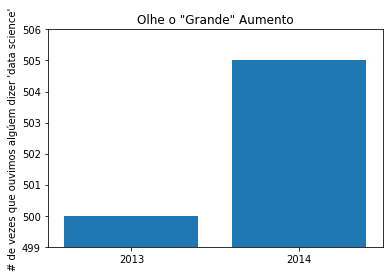

In [11]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2013, 2014], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# de vezes que ouvimos algúem dizer 'data science'")

plt.axis([2012.5,2014.5,499,506])
plt.title("Olhe o \"Grande\" Aumento")

plt.show()

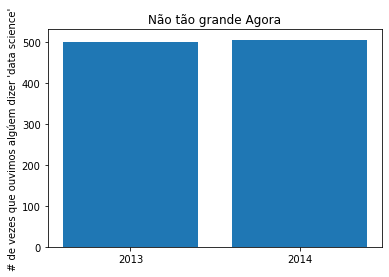

In [12]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2013, 2014], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# de vezes que ouvimos algúem dizer 'data science'")

plt.title("Não tão grande Agora")

plt.show()

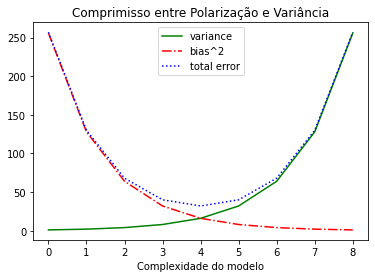

In [13]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total error')

plt.legend(loc=9)
plt.xlabel("Complexidade do modelo")
plt.title("Comprimisso entre Polarização e Variância")
plt.show()

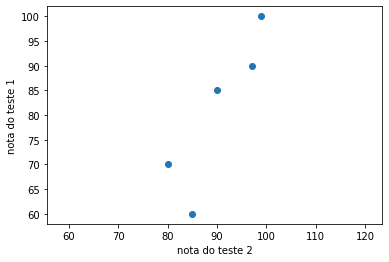

In [14]:
test_1_grades = [99,90,85,97,80]
test_2_grades = [100,85,60,90,70]

plt.scatter(test_1_grades, test_2_grades)
plt.xlabel("nota do teste 2")
plt.ylabel("nota do teste 1")

plt.axis("equal")

plt.show()

# Capítulo 4

## Vetores

In [15]:
def vector_add(v,w):
    """soma elementos correspondentes"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v,w):
    """soma elementos correspondentes"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

vector_sum = partial(reduce, vector_add)

def scalar_multiply(c,v):
    """c é um número, v é um vetor"""
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """computar o vetor cujo i-éstimo elemento seja a média dos i-éstimos elementos dos vetores inclusos"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i* w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v,w))

## Matrizes

In [16]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) or 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """Retorna a matriz num_rows X num_cols
    cuja entrada (i,j)th é entry_fn(i,j)"""
    return [[entry_fn(i,j)
                for j in range(num_cols)]
               for i in range(num_rows)]

def is_diagonal(i,j):
    """1's na diagonal, 0's nos demais lugares"""
    return 1 if i == j else 0



In [17]:
make_matrix(5,5,is_diagonal)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

# Capítulo 5

In [18]:
def mean(x):
    return sum(x) / len(x)

def median(v):
    n = len(v)
    sorted_v = sorted(v)
    mid_point = n // 2
    
    if n % 2 == 1:
        # se for ímpar, retorna o valor do meio
        return sorted_v[mid_point]
    else:
        # se for par, retorna a média dos valores do meio
        lo = mid_point - 1
        hi = mid_point
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
def quantile(x, p):
    """retorna o valor percentual p-éstimo em x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
            if count == max_count]

In [19]:
def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquantile_range(x):
    return quantile(x, .75) - quantile(x, .25)

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / (stdev_x * stdev_y)
    else:
        return 0

In [20]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 ** math.pi)
    return (math.exp(-(x-mu) ** 2 / (2 * sigma ** 2)) / (sqrt_two_pi * sigma))

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / (math.sqrt(2) * sigma)))/2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """encontra o inverso mais próximo usando a busca binária"""
    
    # se não for padrão, computa o padrão e redimensiona
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break;
    
    return mid_z

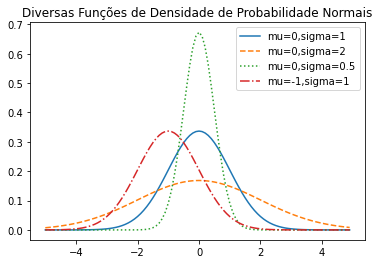

In [21]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-',label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--',label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=.5) for x in xs], ':',label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs], '-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Diversas Funções de Densidade de Probabilidade Normais")
plt.show()

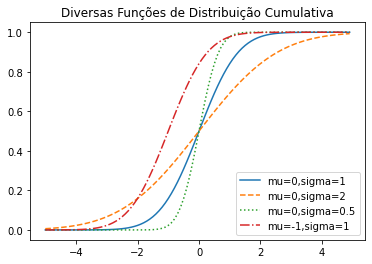

In [22]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs], '-',label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs], '--',label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=.5) for x in xs], ':',label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs], '-.',label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Diversas Funções de Distribuição Cumulativa")
plt.show()

# Capítulo 7

In [23]:
def normal_upper_bound(probability,mu=0,sigma=1):
    """Retorna z para que P(Z <= z) = probability"""
    return inverse_normal_cdf(probabily, mu, sigma)

def normal_lower_bound(probabily, mu=0, sigma=1):
    """retorna z para que p(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probabily, mu, sigma)

def normal_two_sided_bounds(probabily, mu=0, sigma=1):
    """retorna os limites simétricos (sobre a média)
    que contêm a probabilidade específica"""
    tail_probability = (1-probabily) / 2
    
    #fator de giro
    spin = inverse_normal_cdf(tail_probability,0,sigma)
    
    return mu - spin, mu + spin

# Capítulo 8

In [24]:
def difference_quotient(f,x,h):
    """Aproximação da derivada, para um h suficientemente pequeno"""
    return (f(x+h) - f(x)) / h

Exemplo:

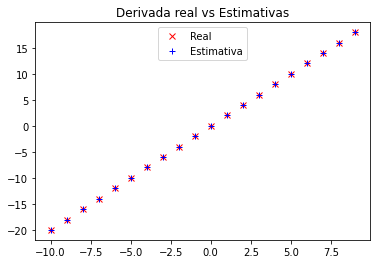

In [25]:
def square(x):
    return x * x

def derivate_of_square(x):
    return 2 * x

derivate_estimate = partial(difference_quotient,square,h=0.00001)

x = range(-10,10)
plt.title("Derivada real vs Estimativas")
plt.plot(x, [derivate_of_square(i) for i in x], 'rx', label='Real')
plt.plot(x, [derivate_estimate(i) for i in x],'b+', label='Estimativa')
plt.legend(loc=9)
plt.show()

Para múltiplas variáveis:

In [26]:
def partial_difference_quotient(f,v,i,h):
    """computa o i-éstimo quociente diferencial parcial de f em v"""
    w = v.copy()
    w[i] += h
    
    return (f(w) - f(v))/h

def estimate_gradient(f, v, h=.00001):
    return [partial_difference_quotient(f,v,i,h) for i, _ in enumerate(v)]

In [27]:
def step(v, direction, step_size):
    """mover step_size na direção a partir de v"""
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# escolher um ponto aleatório
v = [random.randint(-10,10) for i in range(3)]
tolerance = .0000001

while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient,-0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
    
print(v) # bem próximo de [0,0,0]

[-2.455396212587199e-06, 3.069245265734002e-06, -3.069245265734002e-06]


Função que regula os valores inválidos da função

In [28]:
def safe(f):
    """Retorna uma nova função igual a f,
    exceto que ele exibe infinitos como saída toda vez que f produz um erro"""
    
    try:
        return f(*args,**kwargs)
    except:
        return float('inf')
    
    return safe_f

In [29]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=.00001):
    """usa o graidente descendente para encontrar theta que minimize a função alvo"""
    
    step_sizes = [100,10,1,.1,.01,.001,.0001,.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                      for step_size in step_sizes]

def negate(f):
    """Retorna uma função que para qualquer x retorna -f(x)"""
    return lambda *args, **kwargs: -f(*args,**kwargs)

def negate_all(f):
    """o memso quando f retorna uma lista de números"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=.000001):
    return minimize_batch(negate(target_fn),
                         negate_all(gradient_fn),
                         theta_0,
                         tolerance)

In [30]:
def in_random_order(data):
    """gerador retorna os elementos do dado em ordem aleatória"""
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x,y))
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9

        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i,y_i,theta)
            theta = vector_subtract(theta,scalar_multiply(alpha,gradient_i))
            
    return min_theta

def minimize_stochastic2(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x,y))
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
    
        gradient = [0 for _ in range(len(x))]
        for x_i, y_i in data:
            gradient = vector_add(gradient, gradient_fn(x_i,y_i,theta))
        
        theta = vector_subtract(theta,scalar_multiply(alpha,gradient))
    
    return min_theta

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x,y,theta_0,alpha_0)

# Capítulo 9

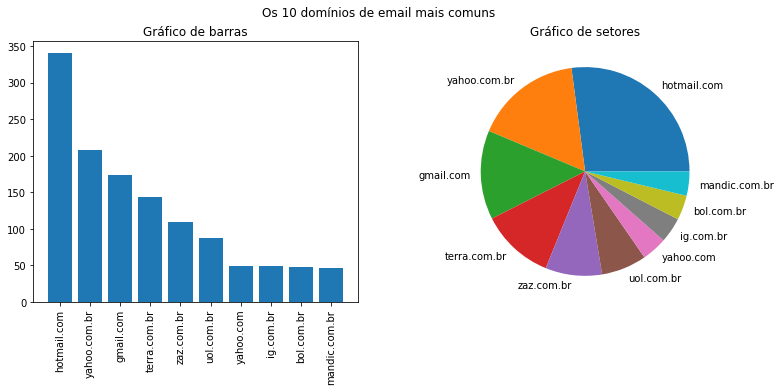

In [31]:
def get_domain(email_address):
    return email_address.lower().split("@")[-1]

with open("lista_email.txt",'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                           for line in f
                           if "@" in line)

most_common = domain_counts.most_common(10)

keys = [key for key, value in most_common]
values = [value for key, value in most_common]

plt.figure(figsize=(6.4 * 2, 4.8))
plt.suptitle("Os 10 domínios de email mais comuns")

plt.subplot(1,2,1)
plt.title("Gráfico de barras")
plt.bar(keys,values)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.title("Gráfico de setores")
plt.pie(values,labels=keys)
plt.show()

In [32]:
import csv

with open('tab_demited_stock_prices.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.84
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


In [33]:
import csv

with open('tab_demited_stock_prices.txt', 'r') as f:
    reader = csv.DictReader(f, delimiter='\t',fieldnames=["date","symbol","closing_price"])
    dicionario = []
    for row in reader:
        dicionario.append(row)
print(dicionario)

[{'date': '6/20/2014', 'symbol': 'AAPL', 'closing_price': '90.91'}, {'date': '6/20/2014', 'symbol': 'MSFT', 'closing_price': '41.68'}, {'date': '6/20/2014', 'symbol': 'FB', 'closing_price': '64.5'}, {'date': '6/19/2014', 'symbol': 'AAPL', 'closing_price': '91.84'}, {'date': '6/19/2014', 'symbol': 'MSFT', 'closing_price': '41.51'}, {'date': '6/19/2014', 'symbol': 'FB', 'closing_price': '64.34'}]


In [34]:
import csv
import codecs

with open('colon_demited_stock_prices.txt', 'r') as f:
    reader = csv.DictReader(f, delimiter=':')
    dicionario = []
    for row in reader:
        dicionario.append(row)
print(dicionario)

[{'date': '6/20/2014', 'symbol': 'AAPL', 'closing_price': '90.91'}, {'date': '6/20/2014', 'symbol': 'MSFT', 'closing_price': '41.68'}, {'date': '6/20/2014', 'symbol': 'FB', 'closing_price': '64.5'}, {'date': '6/19/2014', 'symbol': 'AAPL', 'closing_price': '91.84'}, {'date': '6/19/2014', 'symbol': 'MSFT', 'closing_price': '41.51'}, {'date': '6/19/2014', 'symbol': 'FB', 'closing_price': '64.34'}]


In [35]:
today_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5}

with codecs.open('comma_delimited_stock_prices.txt', 'wb', encoding='utf8') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock,price])

In [36]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')

In [37]:
soup

<!DOCTYPE html>
<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8"/>
    <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain is

In [38]:
first_paragraph = soup.p
first_paragraph

<p>This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.</p>

In [39]:
all_paragraphs = soup.find_all('p')
all_paragraphs

[<p>This domain is for use in illustrative examples in documents. You may use this
     domain in literature without prior coordination or asking for permission.</p>,
 <p><a href="https://www.iana.org/domains/example">More information...</a></p>]

In [40]:
first_paragraph.get('id')

# Capítulo 10

In [41]:
def bucketize(point, bucket_size):
    """reduza o ponto para o próximo múltiplo mais baixo de bucket_size"""
    return bucket_size * math.floor(point/ bucket_size)
    
def make_histogram(points, bucket_size):
    """agrupa os pontos e conta quantos em cada bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [42]:
random.seed(0)

uniform = [200 * random.random() - 100 for _ in range(10000)]

normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

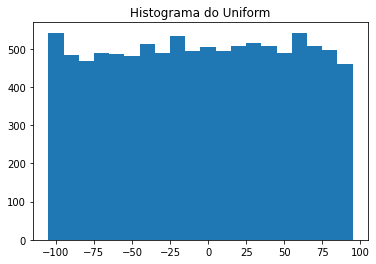

In [43]:
plot_histogram(uniform, 10, "Histograma do Uniform")

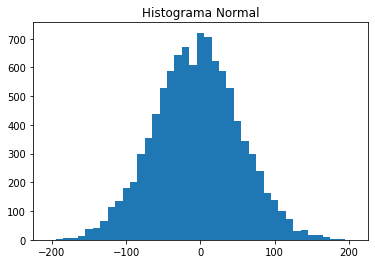

In [44]:
plot_histogram(normal, 10, "Histograma Normal")

In [45]:
def random_normal():
    """retorna um desenho aleatório de uma distribuição normal padrão"""
    return inverse_normal_cdf(random.random())

In [46]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal()/2 for x in xs]
ys2 = [-x + random_normal()/2 for x in xs]

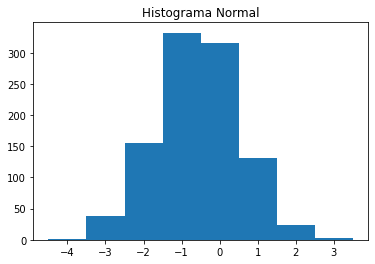

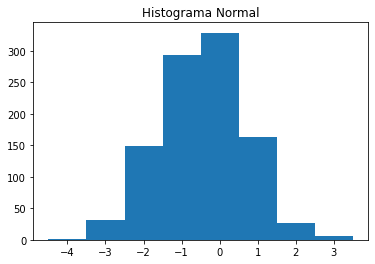

In [47]:
plot_histogram(ys1, 1, "Histograma Normal")
plot_histogram(ys2, 1, "Histograma Normal")

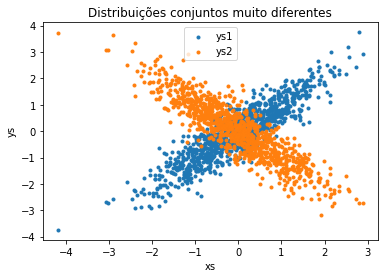

In [48]:
plt.scatter(xs,ys1,marker='.', label='ys1')
plt.scatter(xs,ys2,marker='.', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Distribuições conjuntos muito diferentes")
plt.show()

In [49]:
print(correlation(xs,ys1))
print(correlation(xs,ys2))

0.9010493686379609
-0.8920981526880033


In [50]:
def correlation_matrix(data):
    """retorna o num_columns x num_columns matrix cuja entrada (i,j)-ésima é a correlação entre as colunas de dados i e j"""
    
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

In [51]:
def try_or_none(f):
    """envolve f para retornar None se f levantar uma exceção presume que f leve apenas uma entrada"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

In [52]:
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
           for value, parser in zip(input_row, parsers)]

In [53]:
def parse_rows_with(reader, parsers):
    """envolve um reader para aplicar os interpretadores em cada uma de suas linhas"""
    for row in reader:
        yield parse_row(row, parsers)

In [54]:
import dateutil.parser
data = []

with open("colon_demited_stock_prices_bad.csv","r") as f:
    reader = csv.reader(f,delimiter=':')
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)

In [55]:
data

[[datetime.datetime(2014, 6, 20, 0, 0), 'AAPL', 90.91],
 [datetime.datetime(2014, 6, 20, 0, 0), 'MSFT', 41.68],
 [datetime.datetime(2014, 6, 20, 0, 0), 'FB', 64.5],
 [datetime.datetime(2014, 6, 19, 0, 0), 'AAPL', 91.84],
 [datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None],
 [datetime.datetime(2014, 6, 19, 0, 0), 'FB', 64.34]]

In [56]:
def picker(field_name):
    """retorna uma função que recolhe um campo de um dict"""
    return lambda row: row[field_name]

def pluck(field_name, rows):
    """transforma uma lista de dicts em uma lista de valores field_name"""
    return list(map(picker(field_name),rows))

In [57]:
def group_by(grouper, rows, value_transform=None):
    # a chave é a saída de grouper, o valor é uma lista de linhas
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    
    if value_transform is None:
        return grouped
    else:
        return {key: value_transform(rows)
               for key, rows in grouped.items()}

In [58]:
data

[[datetime.datetime(2014, 6, 20, 0, 0), 'AAPL', 90.91],
 [datetime.datetime(2014, 6, 20, 0, 0), 'MSFT', 41.68],
 [datetime.datetime(2014, 6, 20, 0, 0), 'FB', 64.5],
 [datetime.datetime(2014, 6, 19, 0, 0), 'AAPL', 91.84],
 [datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None],
 [datetime.datetime(2014, 6, 19, 0, 0), 'FB', 64.34]]

In [59]:
group_by(picker("symbol"),dicionario,lambda rows: pluck("closing_price", rows))

{'AAPL': ['90.91', '91.84'],
 'MSFT': ['41.68', '41.51'],
 'FB': ['64.5', '64.34']}

In [60]:
def scale(data_matrix):
    """retorna a média e os desvios padrões de cada coluna"""
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j))
            for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j))
             for j in range(num_cols)]
    return means,stdevs

def rescale(data_matrix):
    """padroniza os dados de entrada"""
    means,stdevs = scale(data_matrix)
    
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j])/stdevs[j]
        else:
            return data_matrix[i][j]
    
    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows,num_cols,rescaled)

In [61]:
def de_mean_matrix(A):
    """retorna o resultado de subtrair de cada valor em A o valor
    da média da sua coluna. a matriz resultado tem a média 0 em cada coluna"""
    nr, nc = shape(A)
    column_means,_ = scale(A)
    return make_matrix(nr,nc,lambda i,j: A[i][j] - column_means[j])

In [62]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

def directional_variance_i(x_i,w):
    """a variância na linha x_i na direção determinada por w"""
    return dot(x_i, direction(w)) ** 2

def directional_variance(X, w):
    """a variância dos dados na direção determinada por w"""
    return sum(directional_variance_i(x_i,w)
              for x_i in X)

In [63]:
def directional_variance_gradient_i(x_i,w):
    """a contribuição da linha x_1 para o gradiente da variância da direção w"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w) for x_i in X)

In [64]:
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maxime_batch(
        partial(direction_variance, X),
        partial(directional_variance_gradient, X),
        guess
    )
    return direction(unscaled_maximizer)

In [65]:
def project(v, w):
    """retorna a projeção de v na direção w"""
    return vector_subtract(v, project(v, w))

def remove_projection(X, w):
    """para cada linha de X
    projeta a linha em w, e subtrai o resultado da linha"""
    return [remove_projection_from_vector(x_i,w) for x_i in X]

def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)

    return components

In [66]:
def transform_vector(v, components):
    return [dot(v, w) for w in components]

def transform(X, components):
    return [transform_vector(x_i, components) for X_i in X]

# Capítulo 11

In [67]:
def split_data(data, prob):
    """divide os dados em frações [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

In [68]:
def train_test_split(x, y, test_pct):
    data = zip(x,y)
    train, test = split_data(data, 1 - test_pct)
    x_train, y_train = zip(*train)
    x_test, y_test= zip(*test)
    return x_train, x_test, y_train, y_test

In [69]:
dados = [1,2,3],[4,5,6]
pontos = zip(*dados)
print(*pontos,sep=', ')

(1, 4), (2, 5), (3, 6)


# Capítulo 12

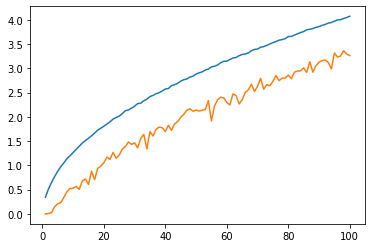

In [70]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

dimensions = range(1, 101)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 1000)
    avg_distances.append(mean(distances))
    min_distances.append(min(distances))
    
plt.plot(dimensions,avg_distances,label="distância média")
plt.plot(dimensions,min_distances,label="distância mínima")

## Naive Bayes

In [71]:
def tokenize(message):
    message = message.lower()
    all_words = re.findall("[a-z0-9]+",message)
    return set(all_words)

def count_words(training_set):
    """o conjunto em treinamento consiste d pares (message, is_spam)"""
    counts = defaultdict(lambda: [0, 0])
    for message, is_spam in training_set:
        for word in tokenize(message):
            counts[word][1 - int(is_spam)] += 1
    return counts

def word_probabilities(counts, total_spams, total_non_spams, k=0.5):
    """transforma o word-counts em uma lista de triplas (w, p(w | spam), p(w | ~spam))"""
    return [(w,
             (spam+k) / (total_spams + 2 * k),
             (non_spam + k) / (total_non_spams + 2 * k))
             for w, (spam, non_spam) in counts.items()]

def spam_probability(word_probs, message):
    message_words = tokenize(message)
    log_prob_if_spam = log_prob_if_not_spam = 0.0
    # itera cada palavra em nosso vocabulário
    for word, prob_if_spam, prob_if_not_spam in word_probs:
        #se "word" aparecer na mensagem, adicione a probabilidade log de vê-la
        if word in message_words:
            log_prob_if_spam += math.log(prob_if_spam)
            log_prob_if_not_spam += math.log(prob_if_not_spam)
        
        #se "word" não aparecer na messagem, adicione a probabilidade log de não vê-la que é log(1 - probabilidade de vêla)
        else:
            log_prob_if_spam += math.log(1 - prob_if_spam)
            log_prob_if_not_spam += math.log(1 - prob_if_not_spam)
            
    prob_if_spam = math.exp(log_prob_if_spam)
    prob_if_not_spam = math.exp(log_prob_if_not_spam)
    return prob_if_spam / (prob_if_spam + prob_if_not_spam)

class NaiveBayesClassifier:
    def __init__(self,k=0.5):
        self.k =k
        self.word_probs = []
    
    def train(self, training_set):
        # conta mensagens spam e não-spam
        num_spams = len([
            is_spam
            for message, is_spam in training_set
            if is_spam
        ])
        
        num_non_spams = len(training_set) - num_spams
        
        word_counts = count_words(training_set)
        self.word_probs = word_probabilities(word_counts,
                                            num_spams,
                                            num_non_spams,
                                            self.k)
        
    def classify(self, message):
        return spam_probability(self.word_probs, message)

path = "emails/*/*"

data = []
for fn in glob.glob(path):
    is_spam = "ham" not in fn
    
    with open(fn,'r', errors="ignore") as file:
        for line in file:
            if line.startswith("Subject:"):
                subject = re.sub(r'^Subject: ', "", line).strip()
                data.append((subject, is_spam))
random.seed(0)
train_data, test_data = split_data(data,.75)

classifier = NaiveBayesClassifier()
classifier.train(train_data)

classified = [(subject, is_spam, classifier.classify(subject))
             for subject, is_spam in test_data]

counts = Counter((is_spam, spam_probability > 0.5)
                for _, is_spam, spam_probability in classified)

# Capítulo 15

In [72]:
def predict(x_i, beta):
    """presume que o primeiro elemento de x é 1"""
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

def squared_error_gradient(x_i, y_i, beta):
    """o grafiente (com respeito a beta)
    correspondente ao i-éstimo termo de erro quadrado"""
    return [-2 * x_ij * error(x_i, y_i, beta)
           for x_ij in x_i]

def estimate_beta(x, y, alpha_0=0.01):
    xt = list(zip(*x))
    
    beta_initial = [random.random() for _ in range(len(x[0]) + 1)]
    mean_x = list(map(mean,xt))
    std_x = list(map(standard_deviation,xt))
    mean_y = mean(y)
    std_y = standard_deviation(y)
    
    xp = [[1] + [(j-m)/s for j, m, s in zip(i, mean_x, std_x)] for i in x]
    yp = [(i - mean_y)/std_y for i in y]

    
    betas_pradrozinados = minimize_stochastic(squared_error,
                              squared_error_gradient,
                              xp, yp,
                              beta_initial, alpha_0)
    
    betas = [beta * std_y/std  for beta, std in zip(betas_pradrozinados[1:], std_x)]
    return [betas_pradrozinados[0] * std_y + mean_y - sum([beta * xbar for beta, xbar in zip(betas, mean_x)])] + betas

In [73]:
espessura = [220.0, 220.0, 220.0, 220.0, 370.0, 370.0, 370.0, 370.0, 440.0, 440.0, 440.0, 440.0, 680.0, 680.0, 680.0, 680.0, 860.0, 860.0, 860.0, 860]
forca = [24.0, 22.0, 19.1, 15.5, 26.3, 24.6, 23.1, 21.2, 25.2, 24.0, 21.7, 19.2, 17.0, 14.9, 13.0, 11.8, 12.2, 11.2, 6.6, 2.8]
espessura2 = [x ** 2 for x in espessura]
x = list(zip(espessura, espessura2))
print(estimate_beta(x,forca,0.0001))

[14.54899113886615, 0.04310881278204442, -5.989278342533874e-05]


Reais:


## Bootstrap
Vamos começar com uma função que retorna os dados em uma distribuição desconhecida (mas seria o WellBull com alpha = 2 e beta = 1)

In [74]:
def WellBull(x, alpha, beta):
    return alpha / beta ** alpha * x * (alpha - 1) * math.exp(-(x / beta) ** alpha)
def get_sample(num_ponts):
    X =  [random.random() * 10 for _ in range(num_ponts)]
    Y = [WellBull(x,2,1) for x in X]
    return Y

In [75]:
data = get_sample(100)

In [76]:
def bootstrap_sample(data):
    """amostra aleatoriamente len(dados) elementos com substituição"""
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data, stats_fn, num_samples):
    """avalia stats_fn em num_samples amostra de inicialização a partir dos dados"""
    return [stats_fn(bootstrap_sample(data))
           for _ in range(num_samples)]

In [77]:
# 101 pontos todos muito próximos de 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 pontos, 50 próximos de 0, 50 póximos de 200
far_from_100 = ([99.5 + random.random()] +
               [random.random() for _ in range(50)] + 
               [200 + random.random() for _ in range(50)])

In [78]:
std_close_to_100 = standard_deviation(bootstrap_statistic(close_to_100, median, 100))
std_far_from_100 = standard_deviation(bootstrap_statistic(far_from_100, median, 100))
print(std_close_to_100, std_far_from_100)

0.04325499674149229 94.61147979327885


Perceba que o primeiro é muito menor que o segundo

In [79]:
def estimate_sample_beta(sample):
    """amostra é uma lista de pares (x_i, y_i)"""
    x_sample, y_sample = zip(*sample)
    return estimate_beta(x_sample, y_sample)

bootstrap_betas = bootstrap_statistic(
    list(zip(x,forca)),
    estimate_sample_beta,
    100
)

[standard_deviation([beta[i] for beta in bootstrap_betas]) for i in range(len(x[0]) + 1)]

Como é muito demorado, resolvi colocar no modo texto, enfim (coloquei alpha_0 = 0.0001):
real: 4.754, 0.01981, 0.00001786
estimado: 5.162817291252101, 0.020314969262091125, 1.818202246147738e-05

# Capítulo 16

In [80]:
def logistic(x):
    return 1.0 / (1 + math.exp(-x))

def logistic_prime(x):
    # derivada de logistic
    return logistic(x) * (1 - logistic(x))

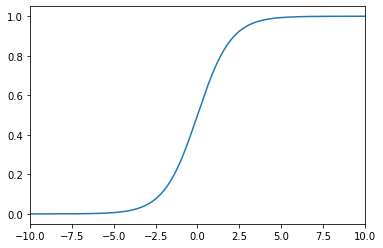

In [81]:
X = [-10 + i * .02 for i in range(1000)]
Y = list(map(logistic, X))
plt.plot(X,Y)
plt.axis([-10,10,-.05,1.05])
plt.show()

In [82]:
def logistic_log_likelihood_i(x_i, y_i, beta):
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta)))

def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
              for x_i, y_i in zip(x,y))

def logistic_log_partial_ij(x_i, y_i, beta, j):
    """aqui i é o índice do ponto de dados,
    j é o índice da derivada"""
    
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    """o gradiente do log da probabilidade
    correspondente ao i-éstimo pontos de dados"""
    
    return [logistic_log_parcial_ij(x_i, y_i, beta, j)
           for j,_ in enumerate(beta)]

def logistic_log_gradient(x, y, beta):
    return reduce(vectoradd,
                 [logistic_log_gradient_i(x_i, y_i, beta)
                 for x_i, y_i in zip()])

# Capítulo 17

In [83]:
def entropy(class_probabilities):
    """dada uma lista de probabilidade de classe, compute a entropia"""
    return sum(-p * math.log(p, 2)
              for p in class_probabilities
              if p)

def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count
           for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

In [84]:
def partition_entropy(subsets):
    """encontre a entropia desta divisão de ados em subconjuntos
    subcojunto é uma lista de listas de dados rotulados"""
    
    total_count = sum(len(subset) for subset in subsets)
    
    return sum(data_entropy(subset) * len(subset) / total_count
              for subset in subsets)

In [85]:
inputs = [
    ({'level':'Senior', 'lang':'Java', 'tweets':'no','phd':'no'}, False),
    ({'level':'Senior', 'lang':'Java', 'tweets':'no','phd':'yes'}, False),
    ({'level':'Mid', 'lang':'Python', 'tweets':'no','phd':'no'}, True),
    ({'level':'Junior', 'lang':'Python', 'tweets':'no','phd':'no'}, True),
    ({'level':'Junior', 'lang':'R', 'tweets':'yes','phd':'no'}, True),
    ({'level':'Junior', 'lang':'R', 'tweets':'yes','phd':'yes'}, False),
    ({'level':'Mid', 'lang':'R', 'tweets':'yes','phd':'yes'}, True),
    ({'level':'Senior', 'lang':'Python', 'tweets':'no','phd':'no'}, False),
    ({'level':'Senior', 'lang':'R', 'tweets':'yes','phd':'no'}, True),
    ({'level':'Junior', 'lang':'Python', 'tweets':'yes','phd':'no'}, True),
    ({'level':'Senior', 'lang':'Python', 'tweets':'yes','phd':'yes'}, True),
    ({'level':'Mid', 'lang':'Python', 'tweets':'no','phd':'yes'}, True),
    ({'level':'Mid', 'lang':'Java', 'tweets':'yes','phd':'no'}, True),
    ({'level':'Junior', 'lang':'Python', 'tweets':'no','phd':'yes'}, False),
]

In [86]:
def partition_by(inputs, attribute):
    """cada entrada é um par (atribute_dict, label).
    retorna uma dict: attribute_value -> inputs"""
    groups = defaultdict(list)
    for inputt in inputs:
        key = inputt[0][attribute]
        groups[key].append(inputt)
    return groups

def partition_entropy_by(inputs, attribute):
    """computa a entropia correspondente à partição dada"""
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

In [87]:
for key in ['level', 'lang', 'tweets', 'phd']:
    print(key, partition_entropy_by(inputs, key))
    
senior_inputs = [(input, label)
                for input, label in inputs if input['level'] == "Senior"]
print()
for key in ['lang', 'tweets', 'phd']:
    print(key, partition_entropy_by(senior_inputs, key))

level 0.6935361388961919
lang 0.8601317128547441
tweets 0.7884504573082896
phd 0.8921589282623617

lang 0.4
tweets 0.0
phd 0.9509775004326938


In [88]:
def classify(tree, inputt):
    """classifica a entrada usando a árvore de decisão fornecida"""
    
    # se for um nó folha, retorna seu valor
    if tree in [True, False]:
        return true
    
    # se não, esta árvore consiste de uma caraterística para dividir
    # e um dicionário cujas chaves são valores daquela característica
    # e cujos valores são sub-árvores para considerar depois
    attribute, subtree_dict = tree
    
    subtree_key = inputt.get(attribute)
    
    if subtree_key not in subtree_dict:
        subtree_key = None
        
    subtree = subtree_dict[subtree_key]
    return classify(subtree, input)

In [89]:
def build_tree_id3(inputs, split_candidates=None):
    # se este é nosso primeiro passo,
    # todas as chaves da primeira entrada são candidatos divididos
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()
        
    # conta Trues e Falses nas entradas
    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues
    
    if num_trues == 0: return False
    if num_falses == 0: return True
    
    if not split_candidates:
        return num_trues >= num_falses
    
    best_attribute = min(split_candidates,
                        key = partial(partition_entropy_by, inputs))
    
    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates
                     if a != best_attribute]
    
    subtrees = {attribute_value: build_tree_id3(subset, new_candidates)
               for attribute_value, subset in partitions.items()}
    
    subtrees[None] = num_trues > num_falses
    
    return (best_attribute, subtrees)

In [90]:
build_tree_id3(inputs)

('level',
 {'Senior': ('tweets', {'no': False, 'yes': True, None: False}),
  'Mid': True,
  'Junior': ('phd', {'no': True, 'yes': False, None: True}),
  None: True})

In [91]:
- 3/5 * math.log(3/5, 2) - (2/5) * math.log(2/5, 2)

0.9709505944546686

# Capítulo 18

In [92]:
def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """retorna 1 se a perceptron 'disparar', 0 se não"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)

In [93]:
def and_gate(x):
    return perceptron_output([2,2], -3, x)

def or_gate(x):
    return perceptron_output([2,2], -1, x)

def not_gate(x):
    return perceptron_output([-2], 1, x)

def neuron_output(weights, inputs):
    return logistic(dot(weights, inputs))

In [94]:
def feed_forward(neural_network, input_vector):
    """recebe a rede neural
    (representada como uma lista de listas de listas de pesos)
    e retorna a saída a partir da entrada a se propagar"""
    
    outputs = []
    
    # processa uma camada por vez
    for layer in neural_network:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias)
                 for neuron in layer]
        outputs.append(output)
    
        input_vector = output
    
    return outputs

In [95]:
xor_network = [
    [[20, 20, -30],
     [20, 20, -10]],
    [[-60, 60,-30]]
]

for x in [0, 1]:
    for y in [0, 1]:
        print(x, y, feed_forward(xor_network, [x,y])[-1])

0 0 [9.38314668300676e-14]
0 1 [0.9999999999999059]
1 0 [0.9999999999999059]
1 1 [9.383146683006828e-14]


In [96]:
def backpropagate(network, input_vector, targets):
    hidden_outputs, outputs = feed_forward(network, input_vector)
    
    # a saída (1 - output) é a derivada da sigmoid
    output_deltas = [output * (1 - output) * (output - target)
                  for output, target in zip(outputs, targets)]
    
    # ajusta os pesos para a camada de saída, um neurônio por vez
    for i, output_neuron in enumerate(network[-1]):
        # foca no i-ésimo neurônio da camada de saída
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # ajuda o j-ésimo peso baseado em ambos
            # o delta deste neurônio e sua j-ésima entrada
            output_neuron[j] -= output_deltas[i] * hidden_output
            
    # erros de backpropagation para a camada oculta
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                        dot(output_deltas, [n[i] for n in network[-1]])
                    for i, hidden_output in enumerate(hidden_outputs)]
    
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

In [97]:
targets = [[1 if i == j else 0 for i in range(10)]
          for j in range(10)]

In [98]:
targets

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [99]:
from numeros import inputs
random.seed(0)
input_size = 25
num_hidden = 5
output_size = 10

hidden_layer = [[random.random() for _ in range(input_size + 1)]
               for _ in range(num_hidden)]

output_layer = [[random.random() for _ in range(num_hidden + 1)]
               for _ in range(output_size)]

network = [hidden_layer, output_layer]

def predict(inputt):
    return feed_forward(network, inputt)[-1]

In [100]:
for _ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

In [101]:
saida = predict([
    0,1,1,1,0,
    0,0,0,1,1,
    0,0,1,1,0,
    0,0,0,1,1,
    0,1,1,1,0
])

for s in saida:
    print(round(s,2),end=' ')
print()

0.0 0.0 0.0 0.94 0.0 0.0 0.0 0.01 0.0 0.13 


In [102]:
saida = predict([
    0,1,1,1,0,
    1,0,0,1,1,
    0,1,1,1,0,
    1,0,0,1,1,
    0,1,1,1,0
])

for s in saida:
    print(round(s,2),end=' ')
print()

0.0 0.0 0.0 0.0 0.0 0.59 0.0 0.0 0.95 1.0 


In [103]:
class KMeans:
    """executa agrupamentos K-means"""
    
    def __init__(self, k):
        self.k = k
        self.means = None
        
    def classify(self, inputt):
        """retorna o índice do agrupamento mais próxima da entrada"""
        return min(range(self.k),
                  key=lambda i: squared_distance(inputt, self.means[i]))
    
    def train(self, inputs):
        # escolha pontos k aleatórios como média inicial
        self.means = random.sample(inputs, self.k)
        assignments = None
        
        while True:
            # encontre novas associações
            new_assigments = map(self.classify, inputs)

            # se nenhuma associação mudou, terminamos
            if assignments == new_assigments:
                return

            # senão, mantenha as novas associações
            assignments = new_assigments

            # e compute novas médias, baseado nas novas associações
            for i in range(self.k):
                # encontre todos os pontos associados ao agrupamento i
                i_points = [p for p, a in zip(inputs, assignments) if a == i]

                # certifique-se que i_points não está vazio, para não dividir por 0
                if i_points:
                    self.means[i] = vector_mean(i_points)

random.seed(0)
clusterer = KMeans(3)
clusterer.train(inputs)
print(clusterer.means)

In [104]:
def squared_clusting_erros(inputs, k):
    """encontra o erro ao quadrado total de k-means agrupando as entradas"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.mans
    assignments = map(clusterer.classify, inputs)
    
    return sum(squared_distance(inputt, means[cluster])
              for inputt, cluster in zip(inputs, assignments))

    # agora faça o gráfico de 1 até len(inputs agrupamentos)
    ks = range(1, len(inputs) + 1)
    
    errors = [squared_clusting_erros(inputs, k) for k in ks]
    
    plt.plot(ks, errors)
    plt.xticks(ks)
    plt.xlabel("k")
    plt.ylabel("Total de erros ao quadrado")
    plt.title("Erro Total vs. Número de Agrupamentos")
    plt.show()

In [105]:
path_to_file = r"images.jpg"
import matplotlib.image as mpimg
img = mpimg.imread(path_to_file)
pixels = [pixel for row in img for pixel in row]

clusterer = KMeans(5)
clusterer.train(pixels)

def recolor(pixel):
    cluster = clusterer.classify(pixel)
    return clusterer.means[cluster]

new_img = [[recolor(pixel) for pixel in row] for row in img]

plt.imshow(new_img)
plt.axis('off')
plt.show()

In [106]:
def generate_clusters(base_cluster, num_clusters):
    # comece com uma lista apenas com o agrupamento base
    clusters = [base_cluster]
    
    # desde que ainda não tenhamos agrupamentos o suficiente
    while len(clusters) < num_clusters:
        # escolha o que foi fundido por último
        next_cluster = min(clusters, key=get_merge_order)
        # remova-o da lsita
        clusters = [c for c in clusters if c != next_cluster]
        # e adicione seus filhos à lista, isto é, desfaça a função
        clusters.extends(get_children(next_cluster))

In [110]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

In [200]:
import tabulate
print(tabulate.tabulate(data,headers=["Palavra","# em empregos","# em currículos"]))

Palavra                 # em empregos    # em currículos
--------------------  ---------------  -----------------
big data                          100                 15
Hadoop                             95                 25
Python                             75                 50
R                                  50                 40
machine learning                   80                 20
statistics                         20                 60
data science                       60                 70
analytics                          90                  3
team player                        85                 85
dynamic                             2                 90
synergies                          70                  0
actionable insights                40                 30
think out of the box               45                 10
self-starter                       30                 50
customer focus                     65                 15
thought leadership             

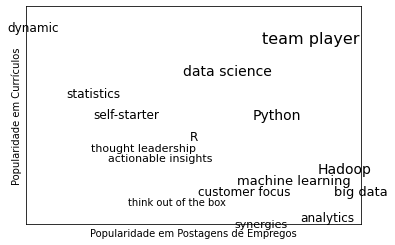

In [213]:
def text_size(total):
    """igual a 8 se o total for 0, 28 se o total for 200"""
    return 8 + total // 20

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
            ha='center', va='center',
            size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularidade em Postagens de Empregos")
plt.ylabel("Popularidade em Currículos")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [151]:
from bs4 import BeautifulSoup
import requests
url = "https://www.cetax.com.br/blog/data-science/"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
artigo = soup.find("div",{'id': "content"}).find('div', {'class': 'post-content'})

In [181]:
regex = r"[\wáàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]+|[\.]"
document = []

In [182]:
for paragraph in artigo("p"):
    words = re.findall(regex, paragraph.text)
    document.extend(words)

In [185]:
bigrams = zip(document, document[1:])
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)

In [187]:
def generate_using_bigrams():
    current = '.'
    result = []
    
    while True:
        next_word_candidates = transitions[current]
        current = random.choice(next_word_candidates)
        result.append(current)
        if current == '.': return " ".join(result)

In [188]:
generate_using_bigrams()

'Até o Big Data Science Ciência de dados gerados em busca de dados em busca de solução para se trabalhar na desmitificação do problema hipóteses de dados .'

In [189]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = defaultdict(list)
starts = []

for prev, current, nextt in trigrams:
    if prev == '.':
        starts.append(current)
        
    trigram_transitions[(prev, current)].append(nextt)

In [190]:
def generate_using_trigrams():
    current = random.choice(starts)
    prev = '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)
        
        prev, current = current, next_word
        result.append(current)
        
        if current == '.':
            return " ".join(result)

In [191]:
generate_using_trigrams()

'Para atuar com Big Data em três perfis ATRIBUIÇÕES E TAREFAS Não tem muito segredo abaixo você pode conferir pontos técnicos importantes para se trabalhar com Big Data deve se compreender os desafios de se trabalhar na área de Business Intelligence aqui em nosso site você pode conferir os cursos que ministramos seu conteúdo programático e tirar dúvidas através do chat online .'

In [221]:
grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

In [218]:
def is_terminal(token):
    return token[0] != "_"

def expand(grammar, tokens):
    for i, token in enumerate(tokens):
        # pula os terminais
        if is_terminal(token): continue
        
        # se chegamos aqui, encontramos um símbolo naõ terminal
        # então precisamos escolher um substituto aleatório
        replacement = random.choice(grammar[token])
        
        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
            
        # agora chama expand da nova lista de símbolos
        return expand(grammar, tokens)
    # se chagamos aqui, temos todos os terminais e acabamos
    return tokens

In [224]:
expand(grammar, ["_S"])

['linear',
 'big',
 'regression',
 'near',
 'linear',
 'Python',
 'near',
 'big',
 'Python',
 'is']

In [238]:
def roll_a_dice():
    return random.choice([1,2,3,4,5,6])

def direct_sample():
    d1 = roll_a_dice()
    d2 = roll_a_dice()
    return d1, d1 + d2

def random_y_given_x(x):
    """igualmente possível de ser x + 1, x + 2, ..., x + 6"""
    return x + roll_a_dice()

def random_x_given_y(y):
    if y <= 7:
        # se o total é 7 ou menos, o primeiro dado é igualmente possível de ser 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # se o total é 7 ou mais, o primeiro dado é igualmente possível de ser (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)
    
def gibbs_sample(num_iters=100):
    x, y = 1, 2 # não importa
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

def compare_distributions(num_samples=1000):
    counts = defaultdict(lambda: [0,0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

In [239]:
result = compare_distributions()

In [241]:
result.values()

dict_values([[30, 30], [29, 30], [25, 22], [28, 26], [23, 29], [25, 26], [33, 28], [19, 31], [31, 31], [36, 37], [25, 23], [24, 24], [32, 26], [28, 28], [31, 18], [24, 32], [33, 28], [28, 22], [29, 34], [28, 30], [24, 37], [37, 28], [30, 22], [18, 21], [34, 29], [23, 19], [23, 31], [28, 35], [31, 29], [21, 31], [15, 24], [28, 30], [33, 30], [30, 29], [29, 23], [35, 27]])

In [242]:
def sample_from(weights):
    """retorna i  com probabilidade de weights[i]/sum(weights)"""
    total = sum(weights)
    rnd = total * random.random()
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0: return i

In [247]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]
K = 4

In [249]:
# a list of Counters, one for each document
document_topic_counts = [Counter() for _ in documents]

# a list of Counters, one for each topic
topic_word_counts = [Counter() for _ in range(K)]

# a list of numbers, one for each topic
topic_counts = [0 for _ in range(K)]

# a list of numbers, one for each document
document_lengths = [len(document) for document in documents]

distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

D = len(documents)

def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
    """
    The fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)
    """
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """
    The fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)
    """
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

def topic_weight(d: int, word: str, k: int) -> float:
    """
    Given a document and a word in that document,
    return the weight for the kth topic
    """
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

In [250]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)

topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]

for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

0 Java 3
0 Big Data 3
0 Hadoop 2
0 HBase 1
0 C++ 1
0 Spark 1
0 Storm 1
0 programming languages 1
0 MapReduce 1
0 Cassandra 1
0 deep learning 1
1 HBase 2
1 neural networks 2
1 Postgres 2
1 MongoDB 2
1 machine learning 2
1 Cassandra 1
1 numpy 1
1 decision trees 1
1 deep learning 1
1 databases 1
1 MySQL 1
1 NoSQL 1
1 artificial intelligence 1
1 scipy 1
2 regression 3
2 Python 2
2 R 2
2 libsvm 2
2 scikit-learn 2
2 mathematics 1
2 support vector machines 1
2 Haskell 1
2 Mahout 1
3 statistics 3
3 probability 3
3 Python 2
3 R 2
3 pandas 2
3 statsmodels 2
3 C++ 1
3 artificial intelligence 1
3 theory 1
['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 7

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 5

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 2
databases 2
machine learning 2

['R', 'Python', 'statistics', 'regression', 'probability']
machine learning 3
databa

# Capútlo 21

In [254]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

for user in users:
    user["friends"] = []
    
for i, j in friendships:
    # isso funciona porque users[i] é o usuário cuja id é i
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

In [256]:
def shortest_paths_from(from_user):
    # um dicionário para "user_id" para todos os caminhos mais curtos para aquele usuário
    shortest_paths_to = {from_user["id"], [[]]}
    
    # uma fila de (previous user, next user) que precisamos verificar. Começar com todos os pares (from_user, friend_of_from_user)
    frontier = deque((from_user, friend)
                    for friend in from_user["friends"])
    
    # continue até esvazia a fila
    while frontier:
        prev_user, user = frontier.popleft()
        user_id = user["id"]
        
        # pela maneira como estamos adcionando na fila, necessariamente já conhecemos alguns dos caminhos mais curtos prev_user
        paths_to_prev_user = shortest_paths_to[prev_user['id']]
        new_paths_to_user = [path + [user_id] for path in paths_to_prev_userh]
        
        # é possível que já saibamos um menos caminho
        old_paths_to_user = shortest_paths_to.get(user_id, [])
        
        # qual é o menor caminho até aqui que já vimos até agora?
        if old_paths_to_user:
            min_path_length = len(old_paths_to_user[0])
        else:
            min_path_length = float('inf')
            
        # apenas mantés caminhos que não são longos demais e são novos
        new_paths_to_user = [path
                            for path in new_paths_to_user
                            if len(path) <= min_path_length
                            and path not in old_paths_to_user]
        
        shortest_paths_to[user_id] = old_paths_to_user + new_paths_to_user
        
        # adcionar os vizinhos nunca vistos antes
        frontier.extend((user, friend)
                       for friend in user["friends"]
                       if friend['id'] not in shortest_paths_to)
        
    return shortest_paths_to